## Requerimientos

Partiendo de la base de datos marvel.csv y siguiendo las instrucciones arreglar los datos para que sean consumibles y entendibles.



In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#1 Cargar el archivo con datos marvel.csv
from google.colab import files
uploaded = files.upload()


Saving marvel.csv to marvel.csv


In [0]:
df = pd.read_csv('marvel.csv')

In [0]:
df

In [0]:
#2 Explorar los datos utilizando las funciones shape, head, describe, etc.

In [0]:
df.shape


In [0]:
df.head(15)

In [0]:

df.describe()

In [0]:
df.tail(3)

In [0]:
df.sample()

In [0]:
df.index

In [0]:
df.values

In [0]:
df.info

In [0]:
df.dtypes

In [0]:
type(df)

In [0]:
#3 Agregar una columna numérica indicando si el personaje es bueno, neutral o malo (ALIGN).

In [0]:
def align_num(x):
  if x == 'Good Characters':
    return 1
  elif x == 'Bad Characters':
    return -1
  else:
    return 0

df['ALIGN NUM'] = df['ALIGN'].apply(align_num)

df.head(50
       )


In [0]:
#4 Calcular el promedio de personajes malos por año usando group by y la columna agregada en el punto anterior.

In [0]:
ye=df.groupby('Year').count()
cantaños=ye.count()
cantaños

In [0]:

#solo los malos
malos=df[df['ALIGN NUM']==-1]
dfmalos=malos.groupby(['Year', 'ALIGN']).count()
promedio=dfmalos['ALIGN NUM'].sum()/cantaños
promedio['ALIGN NUM']
#dfmalos['ALIGN NUM']/countyear['ALIGN NUM']




In [0]:
#5 Contar cantidad de superhéroes vivos y muertos.

In [0]:
df['ALIVE'].value_counts()

In [0]:
#6 Plotear un histograma con la cantidad de personasjes por años en los que fueron creados.

In [0]:

df['Year'].plot(kind='hist', bins=100, figsize=(12,6)).legend()



In [0]:
#7 Hacer una tabla que permita visualizar la relación entre color de ojos y alineamiento de los superhéroes.
# Asegurarse que los superhéroes seleccionados estén vivos todavía. 

In [0]:
#solo los vivos
living = df['ALIVE'].isin(['Living Characters'])
df[living]

In [0]:
#color de ojos y alineamiento
eye = df[living].groupby(['ALIGN','EYE'])
eye.first()

In [0]:
#8 Actualizar la tabla anterior assumiendo que todos los héroes son nuevos y no hay fallecidos.
df2 = df.copy()
df2['ALIVE']='Living Characters'
df2

In [0]:
#9 Crear una tabla que compare alineamientos y año que fue creado.

In [0]:
aly =  pd.pivot_table(df, index='name',columns='ALIGN', values='Year')
aly

In [0]:
#10 Cuál fue el primer superhéroe en aparecer en nuestra tabla?

In [0]:
df['FIRST APPEARANCE'].dropna()
#pasar a fecha
pd.to_datetime(df['FIRST APPEARANCE'], errors='ignore')
#ordenar por fecha
df['FIRST APPEARANCE'].sort_values()
e=df.groupby(['Year','FIRST APPEARANCE'])
e.first()


In [0]:
#Primer personaje creado
e['name'].first().iloc[0:1]

In [0]:
#11 Cuál fue el último superhéroe que apareció en nuestra tabla?
#FALTA OBTENER ULTIMO DATO

In [0]:
#ultimo personaje creado
e[['FIRST APPEARANCE', 'name', 'Year']].tail(5).dropna()

In [0]:


df['name'][max]

'Wild Sentinels (Earth-616)'

In [0]:
#12 Cuál fue la diferencia de fechas entre sus apariciones?

In [0]:
(df['Year'].max())-(df['Year'].min())



74.0

In [0]:
#13 Armar un plot para visualizar como cambió la proporción de personajes femeninos y masculinos a lo largo de los años (usar la columna SEX)

In [0]:
male=df[df['SEX']=='Male Characters']
dfmale=male.groupby('Year').count()
dfmale


In [0]:
female=df[df['SEX']=='Female Characters']
dffemale=female.groupby('Year').count()
dffemale

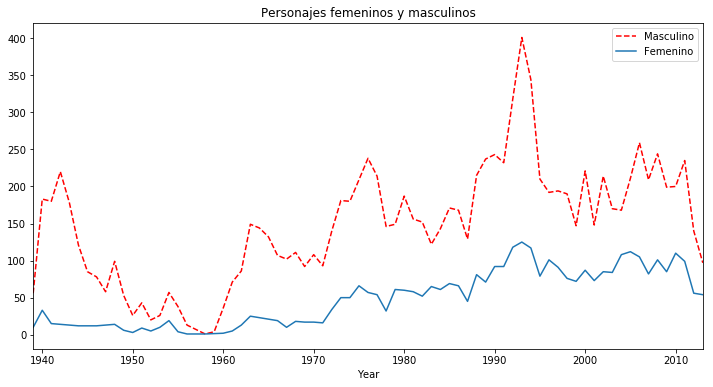

In [0]:

plt.title('Personajes femeninos y masculinos')
e =dfmale['SEX'].plot(figsize=(12,6), style = 'r--')
f =dffemale['SEX'].plot()
e.legend(('Masculino', 'Femenino'))



In [0]:
#14 Crear un objeto MarvelUniverse que reciba en su constructor el path de un archivo CSV y tenga los siguientes métodos:
# 1. get_all_marvel_characters (devuelve el conjunto de nombres de todos los personajes. Por default como un dataframe pero se puede pedir en una lista)
# 2. get_characters_with_alignment (devuelve el conjunto de nombres de todos los personajes cuyo alineamiento tengan la palabra recibida con argumento)
# 3. get_dead_characters (recibe un año y devuelve el conjunto de personajes que murieron  )

In [0]:
class Marvel:
  import pandas as pd
  
  def __init__(self,path):
    self.path = path
    df = pd.read_csv(path)
    
    
  def get_all_marvel_characters(self):
    return df['name']
  
  def get_characters_with_alignment(self, align):
    if align == 'Good Characters':
      return df['name'][df['ALIGN']=='Good Characters']
    
    elif align == 'Bad Characters':
      return df['name'][df['ALIGN']=='Bad Characters']
    elif align == 'Neutral Characters':
      return df['name'][df['ALIGN']=='Neutral Characters']
    else:
      return 'ERROR'
  
  def get_dead_characters(self, year):
    return df[df['Year']==year][df['ALIVE']=='Deceased Characters']
   
    



In [0]:

MarvelUniverse = Marvel('marvel.csv')
MarvelUniverse.get_all_marvel_characters()
MarvelUniverse.get_characters_with_alignment('Neutral Characters')
MarvelUniverse.get_dead_characters(1990)

In [0]:
#15 Pensar en tres preguntas interesantes sobre los datos, escribirlas y generar un análisis y/o un plot para responder cada una.

In [0]:
#calcular superheroes con identidad secreta antes d los 70 y despues. Cuál es menor
secret = df[df['ID'].isin(['Secret Identity'])]
menora=secret[secret['Year']<1970]
men = menora['ID'].count()
mayora=secret[secret['Year']>1970]
may = mayora['ID'].count()

if men < may:
  print('Hay menos superheroes con id secreta antes de 1970. Hay:', men)
else:
  print('Hay más superheroes con id secreta después de 1970. Hay:',may)
  


In [0]:
#cantidad de superheores por año
d = df.groupby('Year')
d['name'].count()

In [0]:
#Apariciones por año según alineamiento
pv = pd.pivot_table(df, index='Year',columns='ALIGN', values='APPEARANCES', aggfunc = np.sum)
pv['Total appearances']=pv.sum(axis = 1)
pv


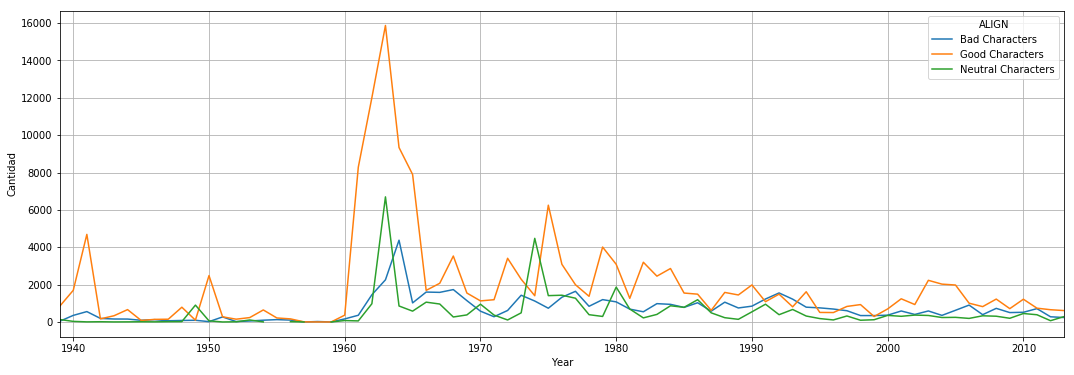

In [0]:
pv.plot(figsize=(18,6))
plt.ylabel('Cantidad')

plt.grid()

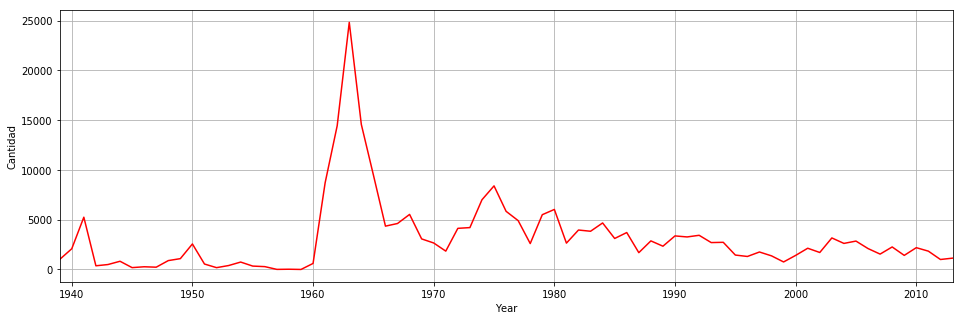

In [0]:
#Total de apariciones por año
pv['Total appearances']=pv.sum(axis = 1).plot(figsize=(16,5), color='red')
plt.ylabel('Cantidad')
plt.grid()